<a href="https://colab.research.google.com/github/ntn-melo/case-study-marketing-department/blob/main/Estudo_de_caso_Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd #para ciração do dataframe
import numpy as np #funções matemáticas
import seaborn as sns #projeções gráficas
import matplotlib.pyplot as plt #projeções gráficas
from sklearn.preprocessing import StandardScaler #escalonamento
from sklearn.cluster import KMeans #para segmentação dos dados/divisão dos clientes
from sklearn.decomposition import PCA #redução de dimensionalidade dos dados

In [ ]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [ ]:
creditcard_df.shape

(8950, 18)

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#cliente com maior compra à vista
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
#cliente com maior compra no cartão de crédito
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

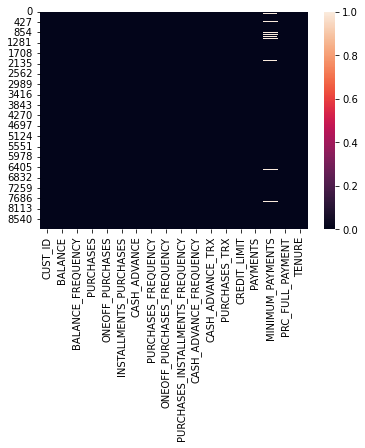

In [ ]:
#visualizando dados nulos
sns.heatmap(creditcard_df.isnull());

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#geramos média no pagamento mínimo pois há vlaores nulos neste atributo, ou seja
#precisamos inserir o valor da média dos valores dentro dos valores nulos para evitarmos erro nos algoritmos
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [ ]:
#atributo minimum_payments receberá a média dos valores do mesmo atributo, onde há valores nulos
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

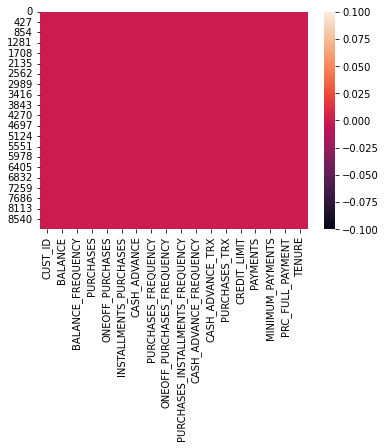

In [ ]:
sns.heatmap(creditcard_df.isnull());

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
#removendo coluna de id pois não é necessário porque cada cliente tem sua própria numeração
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

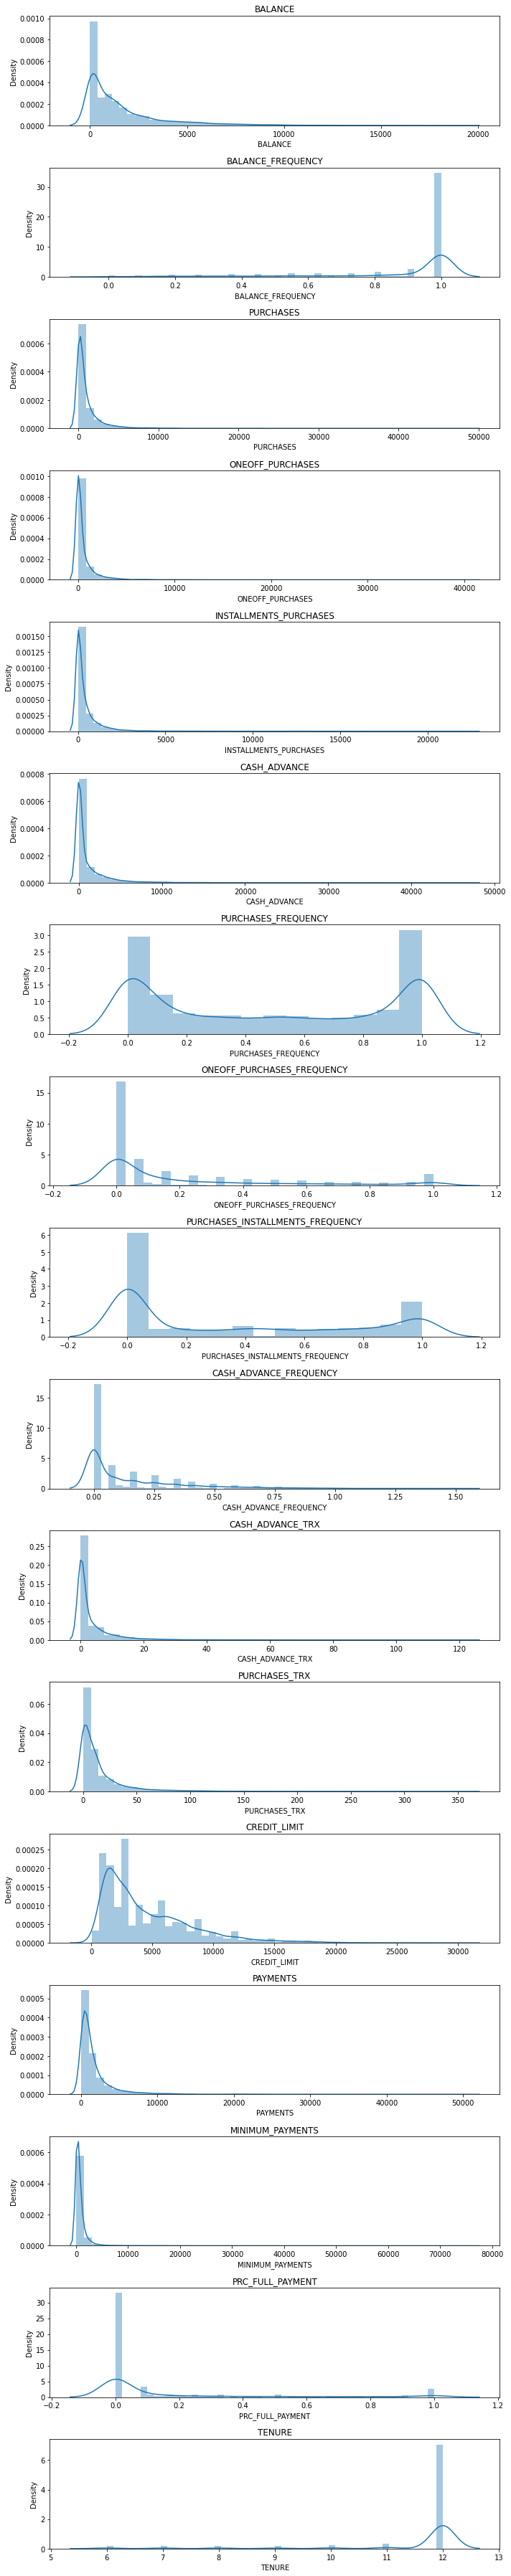

In [ ]:
#projetando histograma
#subplot irá fazer a numeração dos gráficos
#displot gera a linha que percorre as colunas(density)
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [ ]:
#matriz de correlação, quanto um atributo influencia no outro
correlations = creditcard_df.corr()

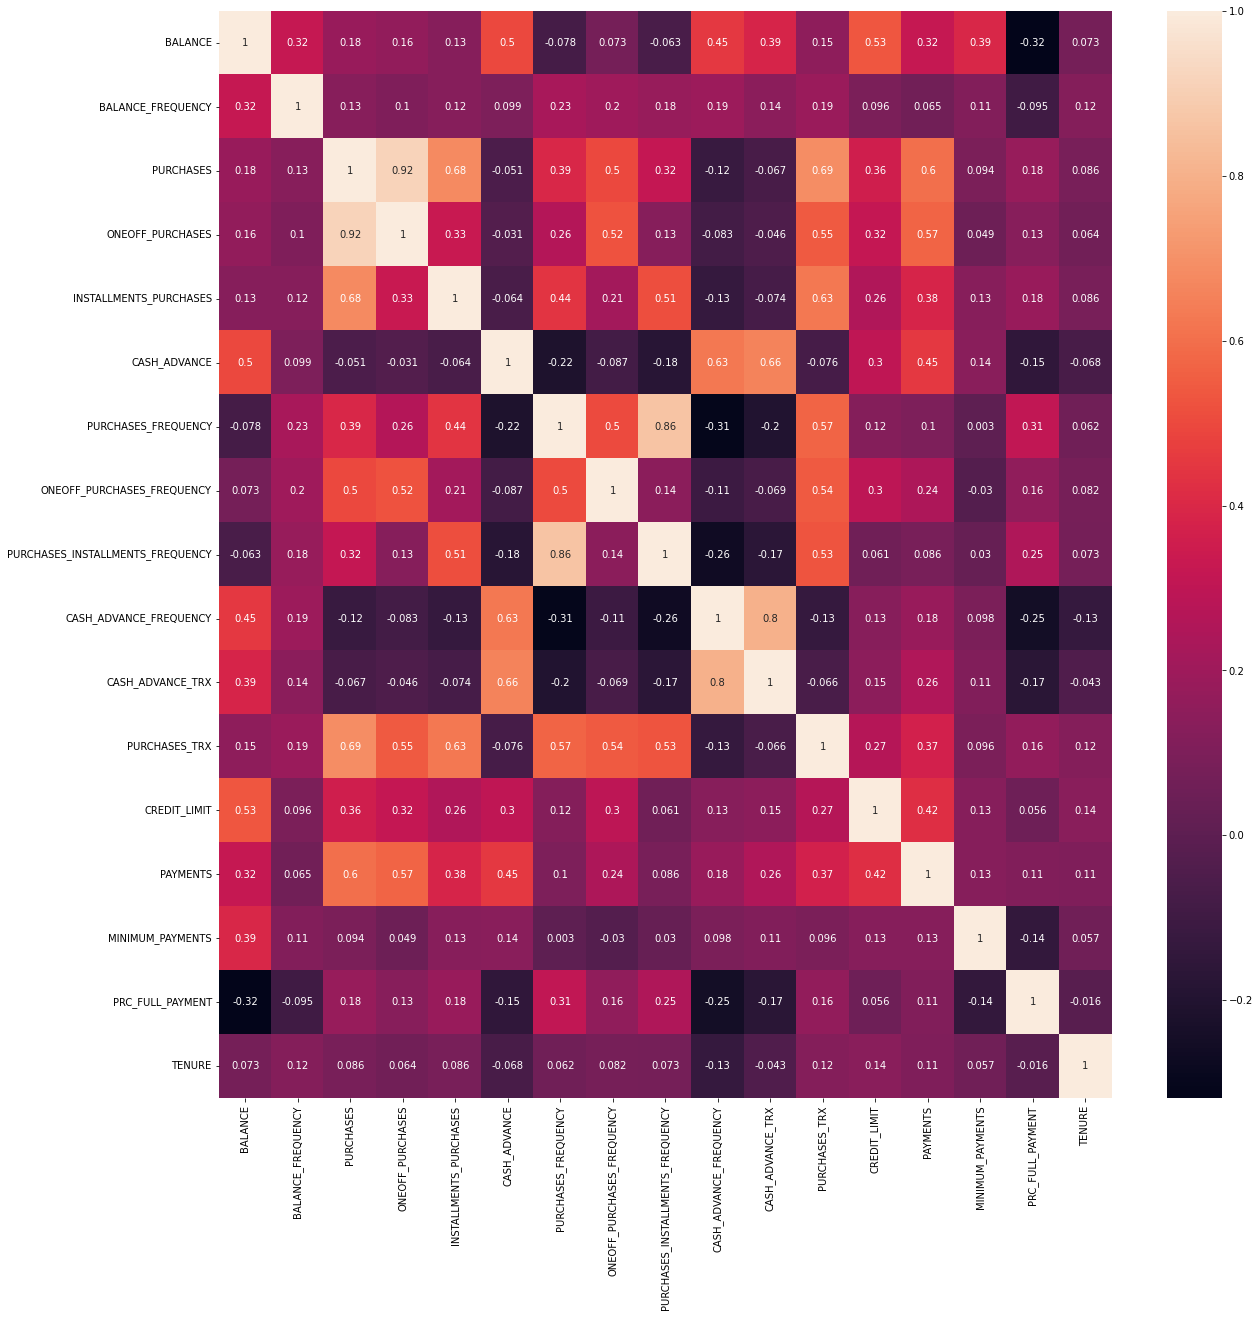

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [ ]:
#padronização dos dados
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
#a bibliotca mudou para numpy, ou seja, para acessarmos o atributo "balance",
#ao invés de digitarmos "balance", devemos acessar o índice correspondente à esse atributo/coluna
#neste caso é o índice "0"
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [ ]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
#agrupamento dos registor e gerando uma lista
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [ ]:
print(wcss_1)

[152150.00000000003, 127784.92424427127, 111986.6980661013, 99073.9592949516, 91502.461479185, 84851.13240432598, 79532.40237691787, 74624.7164396365, 71221.3268517771, 66595.77079493631, 63636.933802143336, 61363.12796511579, 59141.8477439103, 57497.01214743664, 56183.61947700057, 54571.680419768156, 52900.17133010405, 52053.49085618479, 51037.98767843286]


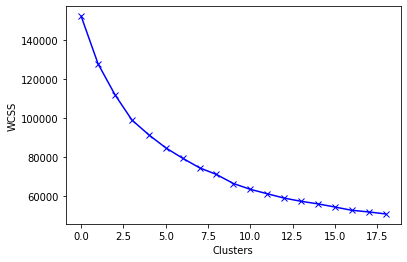

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [ ]:
#concluimos que a quantidade de clusters é 8
#fit cumpre a função de realizar de fato o treinamento do algoritmo
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels, len(labels)

(array([0, 4, 1, ..., 7, 7, 7], dtype=int32), 8950)

In [ ]:
#aqui temos a distribuição dos registros por grupo
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2769, 1123, 2015,  330,  879,   23, 1185,  626]))

In [ ]:
#por fim temos a média de todos os atributos da tabela separadas por grupo
kmeans.cluster_centers_

array([[ 7.99129368e-03,  4.03371841e-01, -3.54671235e-01,
        -2.39406631e-01, -3.98674107e-01, -9.83396809e-02,
        -8.42741726e-01, -3.85249812e-01, -7.51131013e-01,
         9.41599132e-02, -3.46098601e-02, -4.78337471e-01,
        -3.05522457e-01, -2.50487532e-01, -1.32739452e-02,
        -4.54567119e-01,  2.74054618e-01],
       [-1.21275285e-01,  4.03074815e-01,  5.63245473e-01,
         6.83410734e-01,  7.60384296e-02, -3.32537292e-01,
         9.97086755e-01,  1.91368949e+00,  2.12153418e-01,
        -4.17084986e-01, -3.33321370e-01,  6.58171666e-01,
         4.58040139e-01,  1.62137072e-01, -1.55258903e-01,
         4.54802865e-01,  2.72768817e-01],
       [-3.58066748e-01,  3.32433084e-01, -2.95233282e-02,
        -2.40735009e-01,  3.72267273e-01, -3.62520244e-01,
         9.97180199e-01, -3.81258869e-01,  1.20881402e+00,
        -4.71902654e-01, -3.59553411e-01,  1.95129411e-01,
        -2.56957254e-01, -2.13061687e-01, -2.97766650e-02,
         3.14763023e-01,  2.5

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007991,0.403372,-0.354671,-0.239407,-0.398674,-0.098340,-0.842742,-0.385250,-0.751131,0.094160,-0.034610,-0.478337,-0.305522,-0.250488,-0.013274,-0.454567,0.274055
1,-0.121275,0.403075,0.563245,0.683411,0.076038,-0.332537,0.997087,1.913689,0.212153,-0.417085,-0.333321,0.658172,0.458040,0.162137,-0.155259,0.454803,0.272769
2,-0.358067,0.332433,-0.029523,-0.240735,0.372267,-0.362520,0.997180,-0.381259,1.208814,-0.471903,-0.359553,0.195129,-0.256957,-0.213062,-0.029777,0.314763,0.256155
3,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
4,1.677545,0.397372,-0.219728,-0.156146,-0.232743,1.997143,-0.478128,-0.209774,-0.419575,1.915653,1.920851,-0.268755,1.015860,0.798118,0.549593,-0.396212,0.070794
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,-0.700811,-2.137765,-0.309826,-0.234398,-0.301835,-0.320624,-0.553044,-0.440776,-0.438526,-0.521671,-0.376524,-0.418173,-0.173276,-0.192025,-0.256786,0.286929,0.203034
7,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [ ]:
#para a melhor visualização dos dados, agora iremos inverter o escalonamento
#por fim temos a média de cada atributo separado por cada grupo que o cluster dividiu
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1581.108031,0.972826,245.444272,195.071398,50.551596,772.648208,0.152118,0.087530,0.065919,0.153987,3.012640,2.820152,3382.833755,1008.006990,833.272173,0.020762,11.884074
1,1312.050559,0.972755,2206.587469,1726.759216,479.828253,281.524877,0.890530,0.773348,0.448753,0.051681,0.974153,31.069519,6160.986874,2202.514788,502.382219,0.286737,11.882353
2,819.189116,0.956021,940.127788,192.866563,747.704320,218.649226,0.890567,0.088721,0.844851,0.040712,0.795139,19.560020,3559.533830,1116.351146,794.813281,0.245777,11.860119
3,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
4,5056.143326,0.971404,533.752605,333.267190,200.601081,5166.972283,0.298455,0.139878,0.197688,0.518486,16.357224,8.029579,8190.562623,4043.616077,2145.010509,0.037829,11.612059
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,105.795902,0.370854,341.256608,203.384962,138.122110,306.508624,0.268387,0.070966,0.190156,0.030752,0.679325,4.315612,3863.999531,1177.250744,265.776519,0.237636,11.789030
7,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019


In [ ]:
labels, len(labels)

(array([0, 4, 1, ..., 7, 7, 7], dtype=int32), 8950)

In [ ]:
#iremos adicionar novo data frame na variável, concatenando com creditcard_df
#utilziando pd.dataframe definimos o nome da nova coluna em formato de dicionário, axis; nova coluna
#após a geração deste gráfico, nosso departamento de telemarketing possui toda uma base de dados
#para poder focar somente nos clientes que possui uma grande tendência de a venda ser consolidada
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


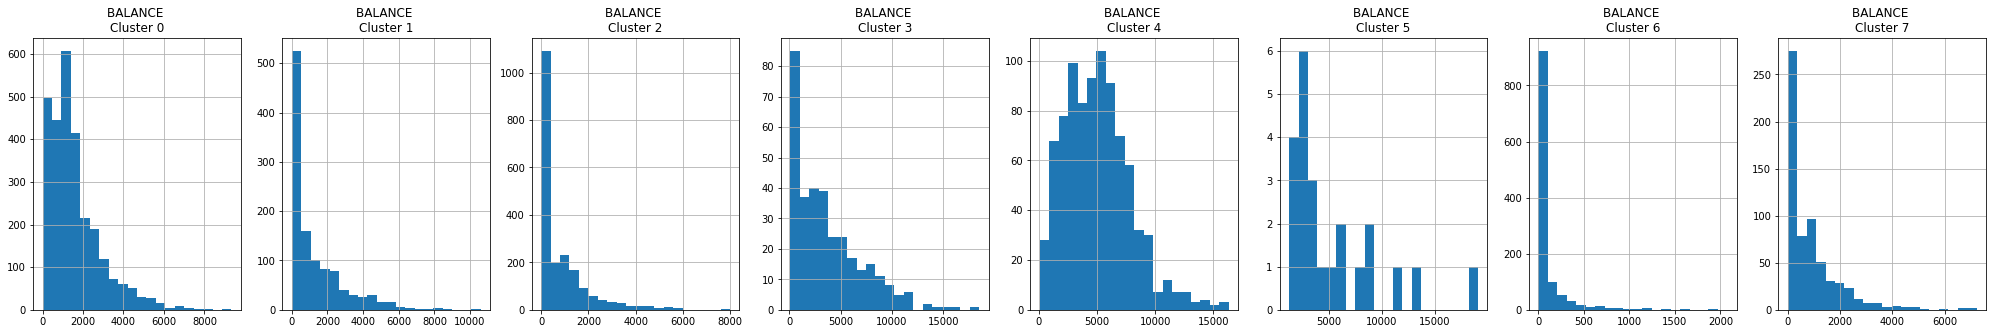

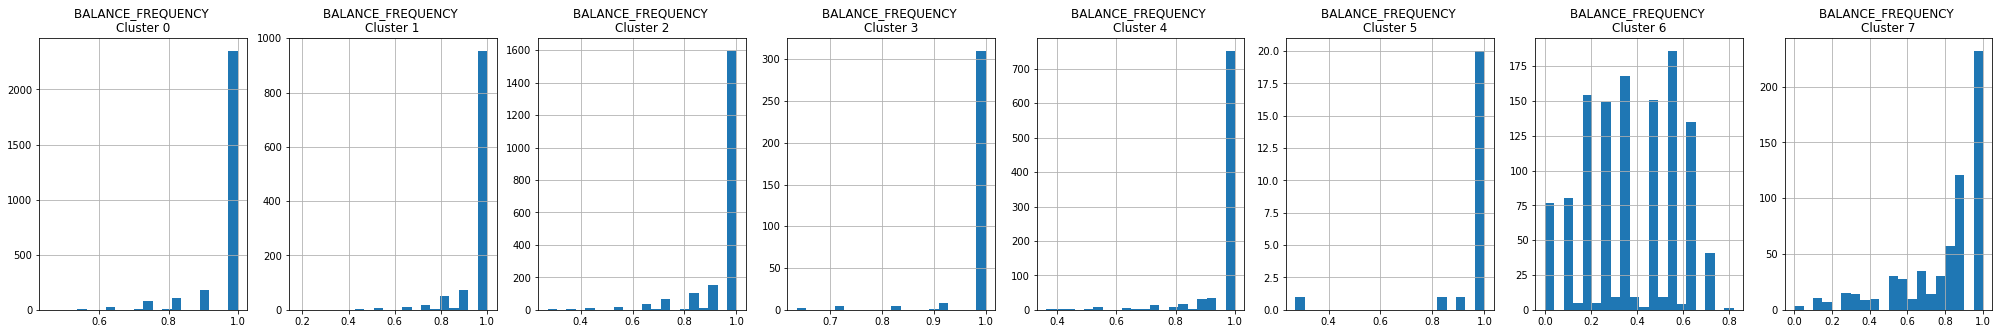

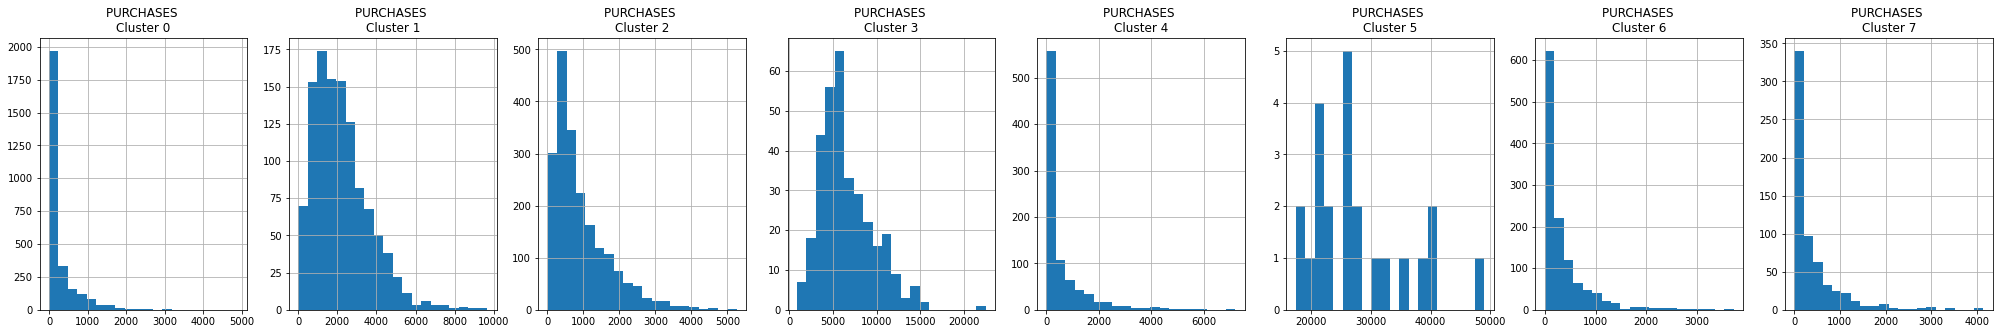

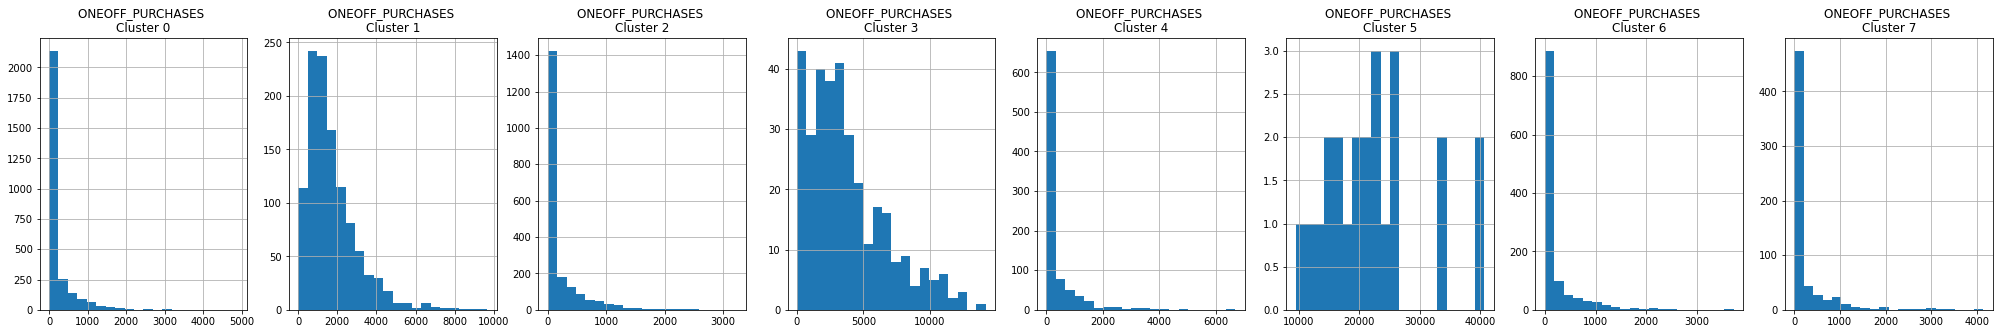

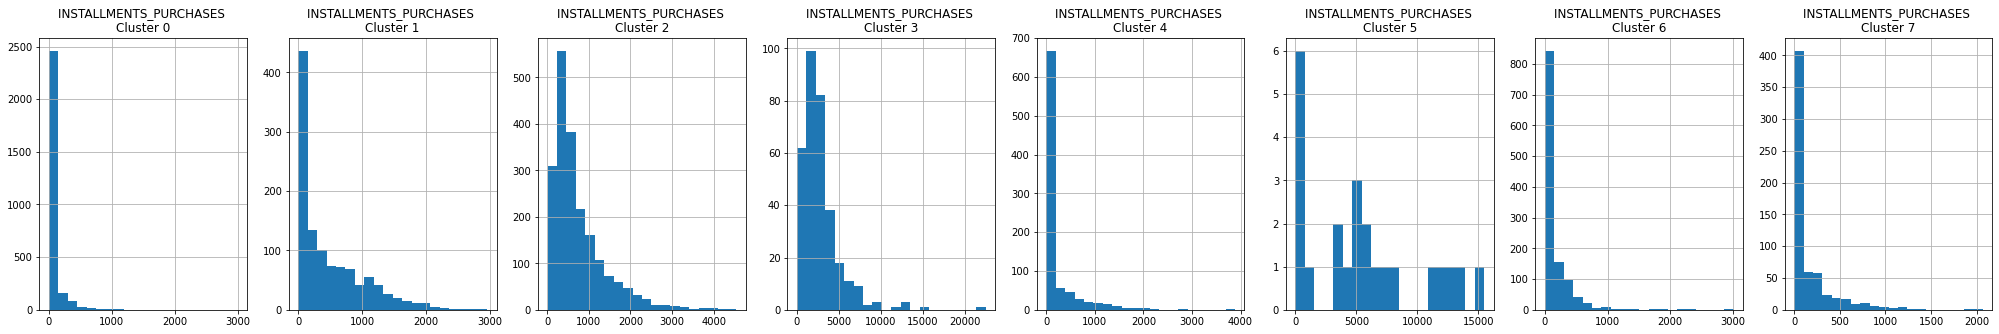

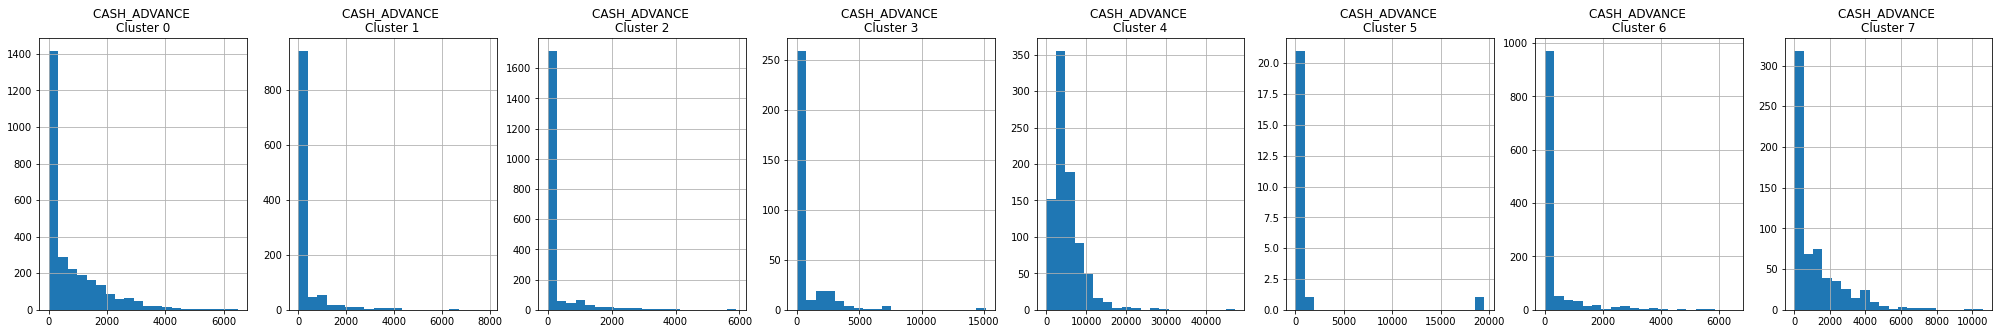

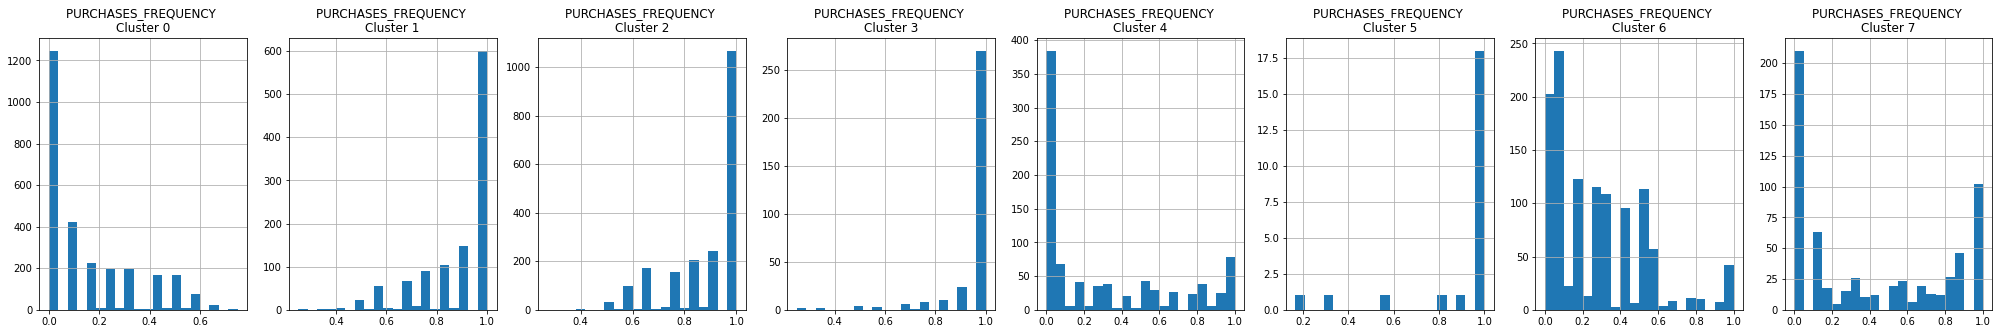

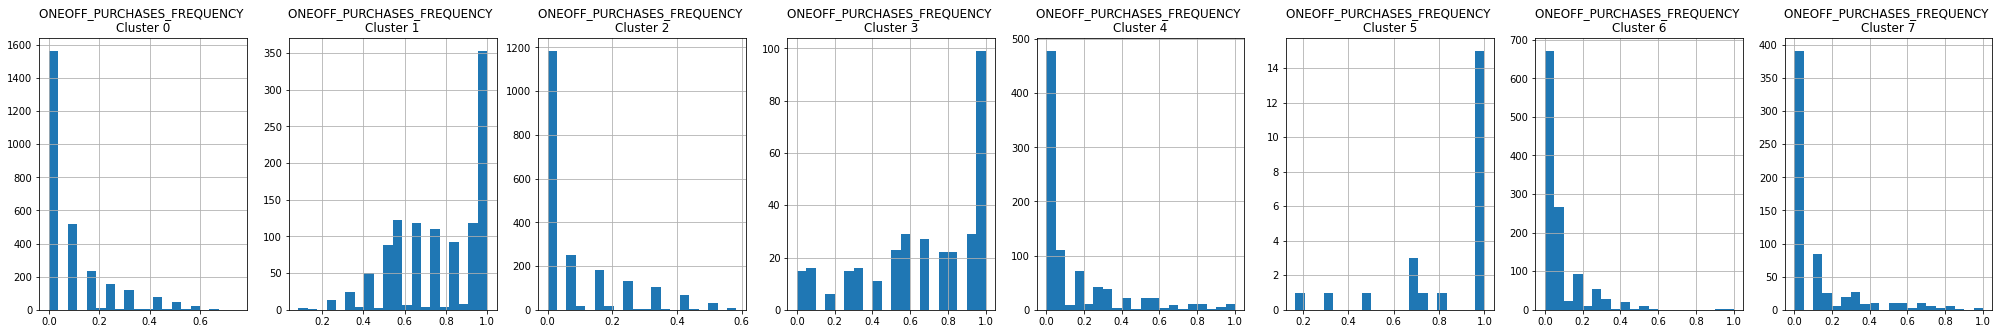

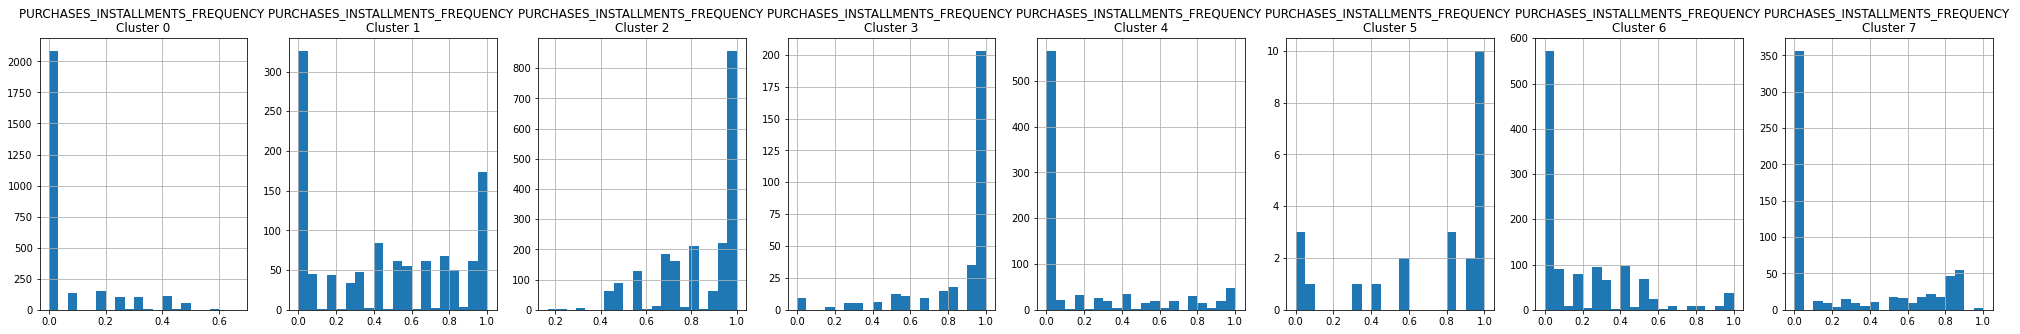

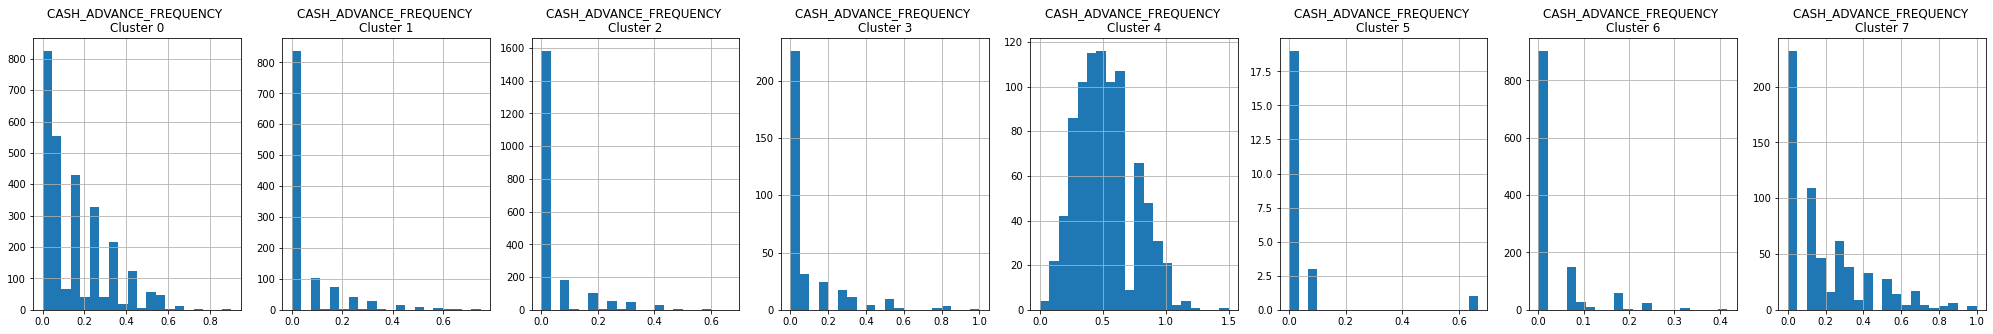

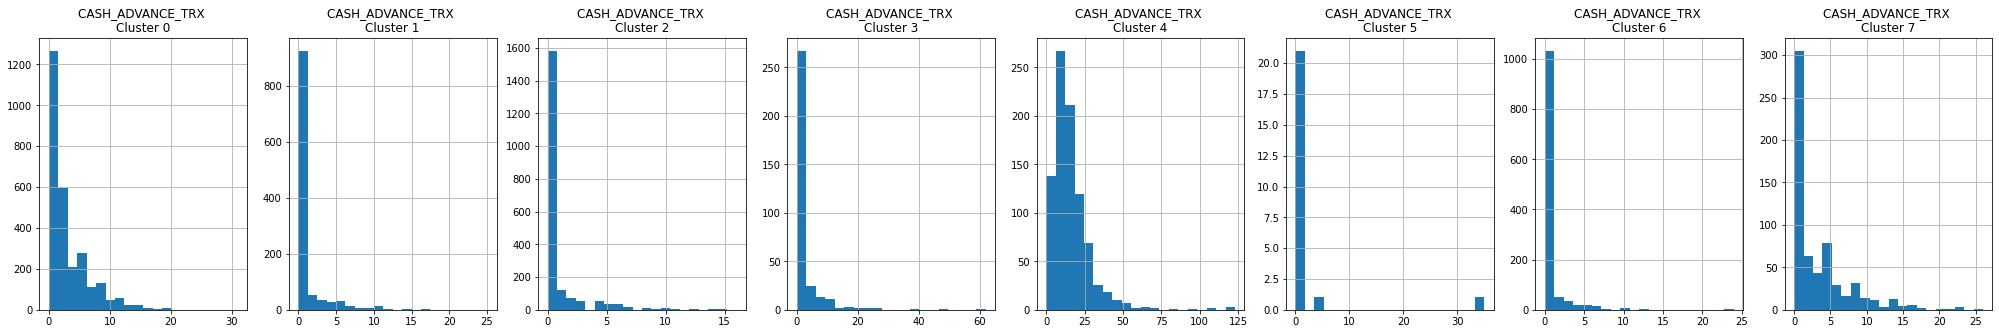

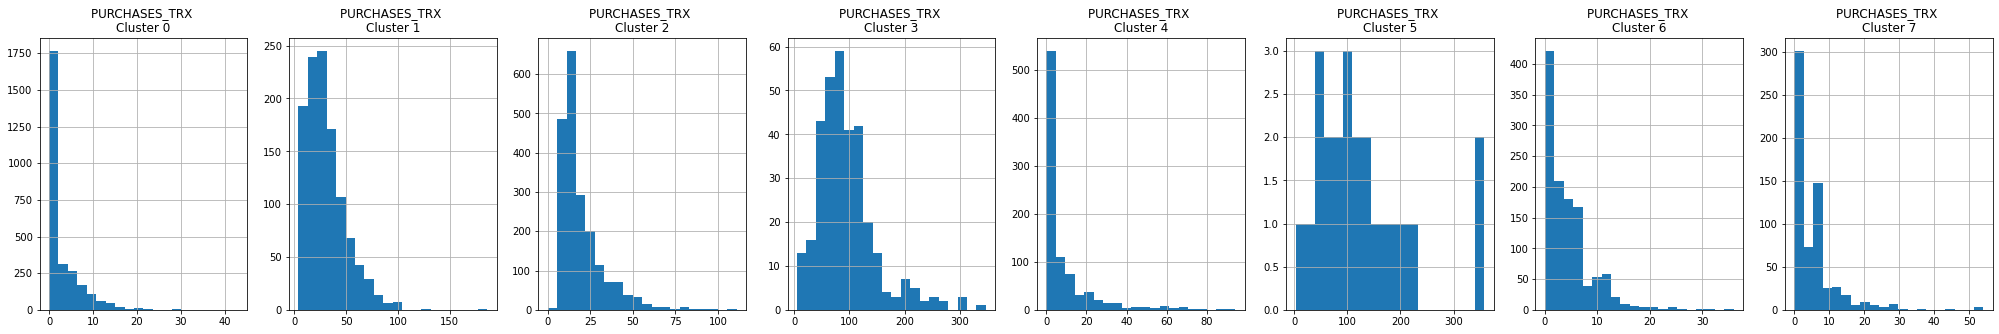

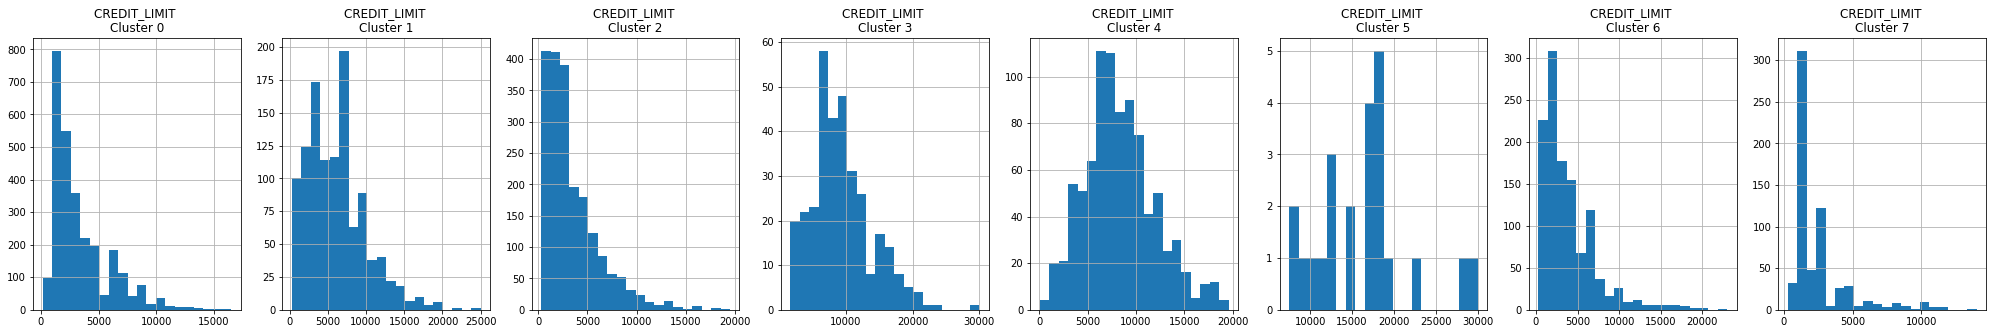

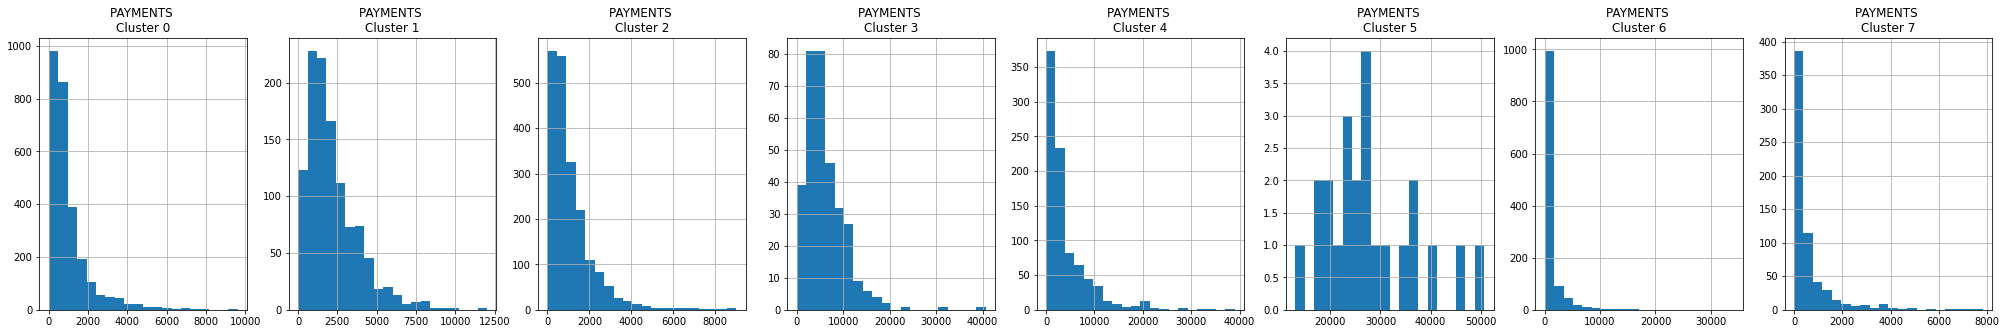

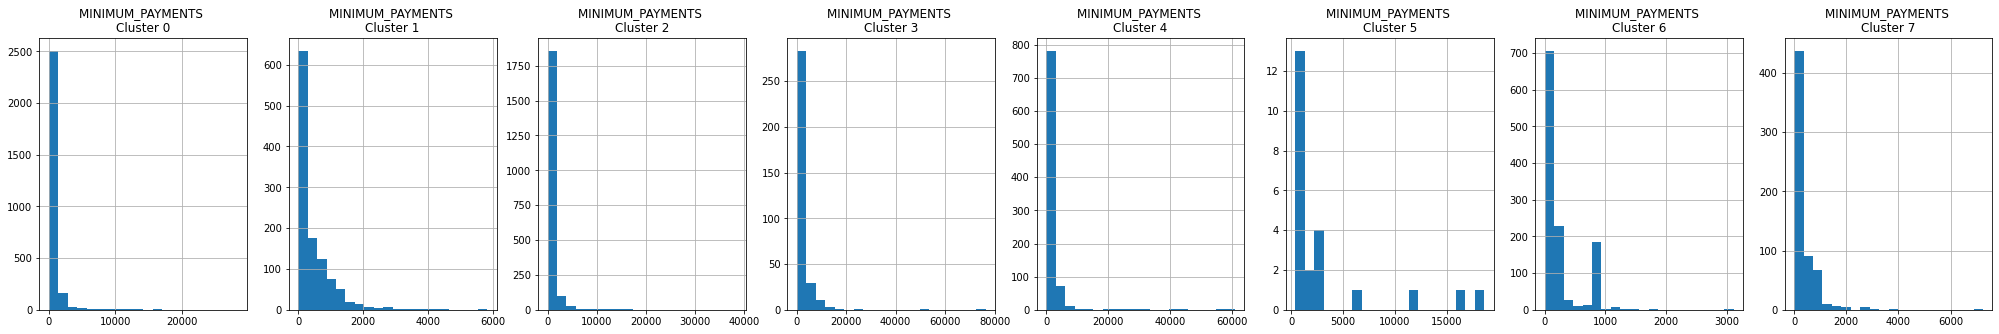

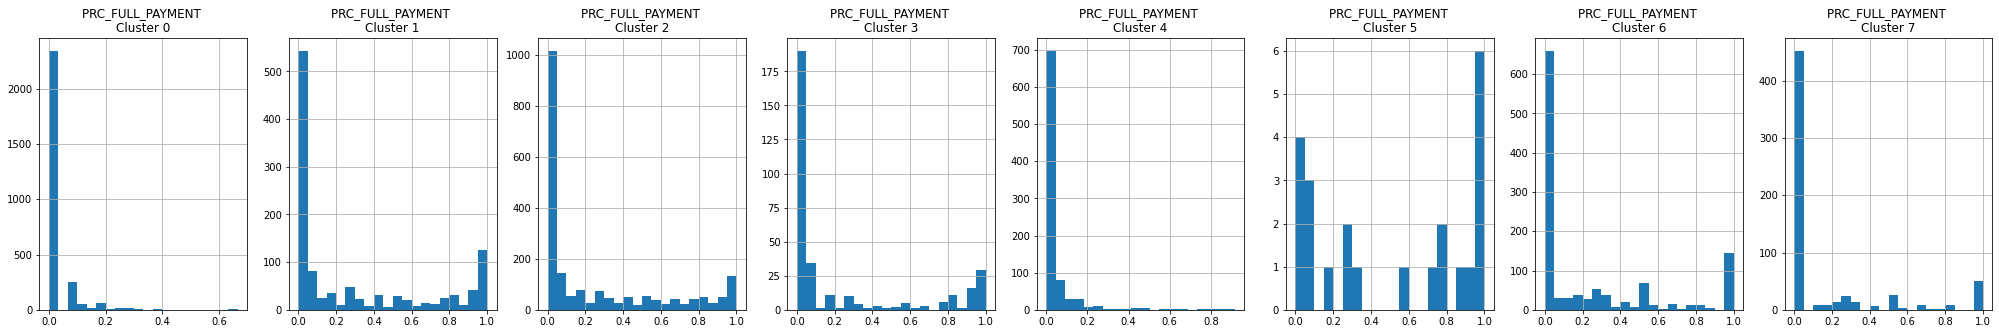

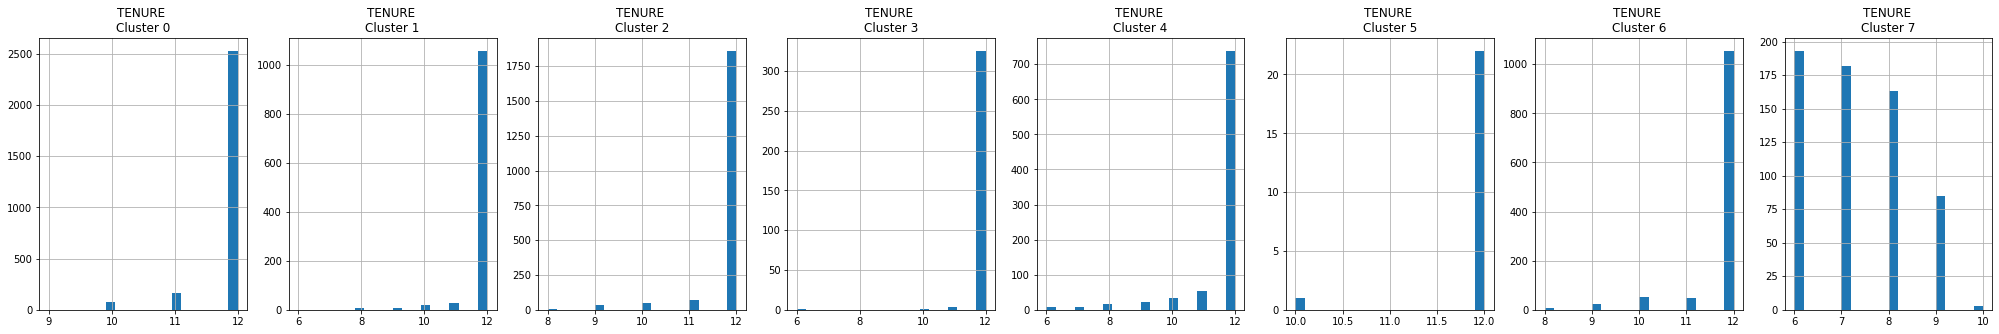

In [ ]:
#plt.subplot(linha,coluna, contagem do gráfico(id do grupo))
#bins(número de divisões)
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4233,1117.003540,1.000000,240.00,240.00,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,9,1200.0,366.532467,1020.099462,0.0,12,0
4234,198.815177,1.000000,247.50,0.00,247.5,0.000000,0.166667,0.000000,0.166667,0.000000,0,3,4000.0,283.508460,249.335824,0.0,12,0
4236,1534.165790,1.000000,0.00,0.00,0.0,635.299075,0.000000,0.000000,0.000000,0.583333,11,0,1800.0,681.290050,439.318862,0.0,12,0
4238,1116.944017,1.000000,182.64,182.64,0.0,109.600359,0.333333,0.333333,0.000000,0.083333,1,4,1500.0,304.822958,347.685591,0.0,12,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6786,2347.486095,1.000000,0.00,0.00,0.0,1957.749127,0.000000,0.000000,0.0,0.428571,9,0,2950.0,3781.991205,3743.011386,0.0,7,7
6785,1118.724569,1.000000,0.00,0.00,0.0,1963.807815,0.000000,0.000000,0.0,0.428571,6,0,2000.0,193.308860,227.879396,0.0,7,7
8316,174.909754,0.833333,0.00,0.00,0.0,721.164710,0.000000,0.000000,0.0,0.333333,3,0,1500.0,221.855473,82.946930,0.0,6,7
2008,3168.902659,0.857143,0.00,0.00,0.0,3854.441191,0.000000,0.000000,0.0,0.285714,6,0,4200.0,390.289118,935.430690,0.0,7,7
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [ ]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
#transformando 18 caractetísticas em 2
ca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222034, -1.07645168],
       [-1.13829693,  2.50647364],
       [ 0.96967959, -0.38352121],
       ...,
       [-0.92620246, -1.81078544],
       [-2.33654893, -0.65796469],
       [-0.55642201, -0.40046441]])

In [ ]:
#definindo o nome das colunas
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138297,2.506474
2,0.969680,-0.383521
3,-0.873628,0.043164
4,-1.599434,-0.688581


In [ ]:
#gerando 
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,0
1,-1.138297,2.506474,3
2,0.969680,-0.383521,3
3,-0.873628,0.043164,0
4,-1.599434,-0.688581,0


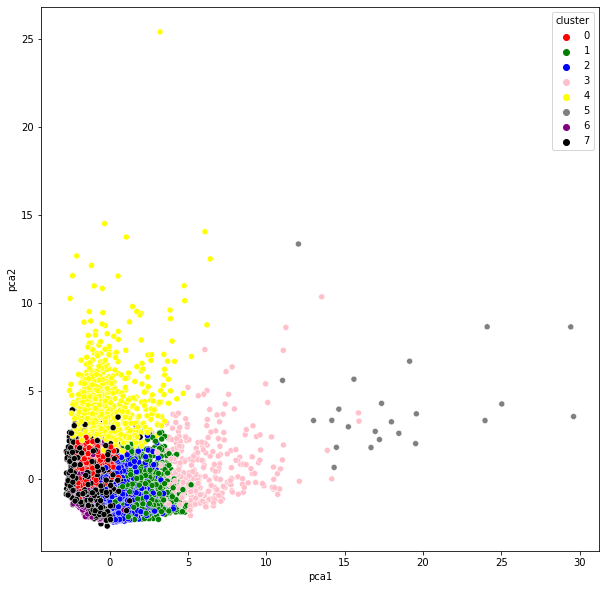

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [ ]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
#neurônios
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
#relu; quando o algoritmo ele entra com valor positivo, ele sai como positivo,
#se o valor entra como negativo, ele sai zerado, ou seja, +2 -> +2 | -20 -> 0

#cada nova variável, representa uma nova ligação dos neurônios
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)
#camada mais importante, armazena somente os dados codificados
encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
# autoencoder (camada inicial com a camada final)
autoencoder = Model(input_df, decoded)

In [ ]:
#armazenando o encoder (camada mais importante) onde tem somente os dados codificados
encoder = Model(input_df, encoded)

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
#aqui o algoritmo irá comparar todos os registros diminuindo a perda de valores originais
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 8s 27ms/step - loss: 0.1769
Epoch 2/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0870
Epoch 3/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0658
Epoch 4/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0416
Epoch 5/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0384
Epoch 6/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0373
Epoch 7/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0565
Epoch 8/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0377
Epoch 9/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0317
Epoch 10/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0286
Epoch 11/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0195
Epoch 12/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0287
Epoch 13/50


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

In [ ]:
compact.shape

(8950, 10)

In [ ]:
#dados orignais
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
#dados compactados
compact[0]

array([0.        , 0.        , 0.64849097, 0.39709073, 0.0947361 ,
       0.22428516, 0.03112566, 0.35917586, 0.16379453, 0.2450738 ],
      dtype=float32)

In [ ]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

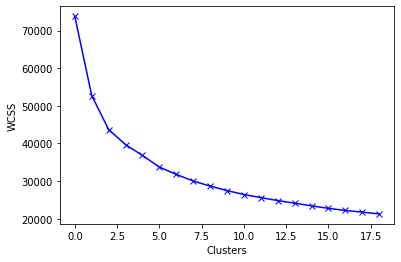

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

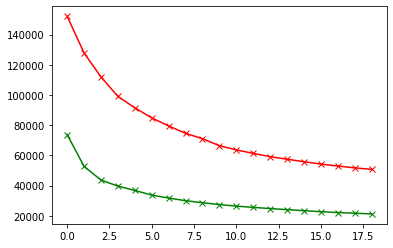

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')  #sem redução dimensional
plt.plot(wcss_2, 'bx-', color = 'g'); #com redução dimensional

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 3, 3, ..., 0, 0, 3], dtype=int32), (8950,))

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.736197,0.185809
1,0.291113,-1.409548
2,0.235581,0.289107
3,-0.991268,0.151643
4,-1.708496,0.198675


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.736197,0.185809,0
1,0.291113,-1.409548,3
2,0.235581,0.289107,3
3,-0.991268,0.151643,0
4,-1.708496,0.198675,0


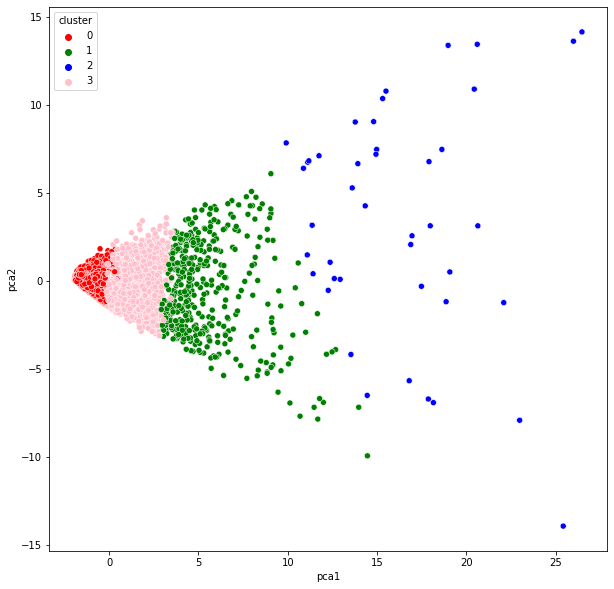

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5628,47.783061,0.181818,0.00,0.0,0.00,545.183508,0.000000,0.000000,0.000000,0.166667,2,0,3000.0,0.000000,864.206542,0.0,12,0
5627,64.031010,1.000000,646.50,95.0,551.50,0.000000,0.833333,0.166667,0.666667,0.000000,0,17,1500.0,564.329726,151.912905,1.0,12,0
5626,1393.098681,1.000000,353.43,0.0,353.43,1465.018056,0.700000,0.000000,0.600000,0.200000,3,14,1500.0,491.576263,502.718043,0.0,10,0
5625,18.430156,0.454545,342.50,342.5,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,6000.0,230.757968,73.567323,0.0,12,0


In [ ]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6126,1621.219401,1.000000,98.40,98.40,0.00,2745.571593,1.000000,1.000000,0.0,0.583333,16,13,4000.0,3592.092848,567.227496,0.166667,12,3
6128,267.668693,1.000000,2518.37,607.56,1910.81,18.561424,1.000000,0.583333,1.0,0.083333,1,51,2500.0,2319.258937,172.731484,0.166667,12,3
6131,41.011184,1.000000,1314.75,125.19,1189.56,0.000000,1.000000,0.500000,1.0,0.000000,0,70,6000.0,1303.104693,135.761304,0.700000,12,3
6181,5314.739322,1.000000,0.00,0.00,0.00,3596.096650,0.000000,0.000000,0.0,0.583333,20,0,8000.0,1582.770873,2632.897525,0.000000,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,3


In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')